# Tratando os dados obtidos no Web Scraping

Os dados que foram obtidos através através de páginas web e então armazenados no MongoDB, porém precismos fazer uma pré-limpeza nestes dados. 
O primeiro passo é carregar os  dados em memória e transformá-los em um DataFrame pandas para facilitar sua manipulação

In [1]:
import pandas as pd
from pymongo import MongoClient
from pandas.io.json import json_normalize

In [2]:
client = MongoClient('localhost', 27017)
rent_collection = client["realestate_scraper"].realestate

In [3]:
cursor = rent_collection.find()
df = json_normalize(cursor)

Vou dar uma olhada em como os dados estão estruturados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 46 columns):
AnuncianteTipo               1466 non-null object
Area                         1466 non-null int64
Bairro                       1466 non-null object
CEP                          1441 non-null object
Cidade                       1466 non-null object
CodImobiliaria               1466 non-null int64
CodigoAnunciante             1466 non-null int64
CodigoOfertaImobiliaria      1466 non-null object
CodigoOfertaZAP              1466 non-null int64
DataAtualizacaoHumanizada    1466 non-null object
DetalhesOferta               1466 non-null object
DistanciaMetro               1466 non-null object
DistanciaOnibus              1466 non-null object
Endereco                     1466 non-null object
Estado                       1466 non-null object
FormatarSubTipoImovel        1466 non-null object
FormatarSubTipoOferta        1466 non-null object
Fotos                        1466 non-null obje

O dataframe possui várias colunas que não nos interessam, por isso irei eliminá-las

In [5]:
df = df.drop(columns=[
    "AnuncianteTipo",
    "CodImobiliaria",
    "CodigoAnunciante",
    "CodigoOfertaImobiliaria",
    "CodigoOfertaZAP",
    "DetalhesOferta",
    "DistanciaMetro",
    "DistanciaOnibus",
    "Fotos",
    "LogNota",
    "NomeAnunciante",
    "Nota",
    "Observacao",
    "OrigemLead",
    "TituloPagina",
    "Transacao",
    "URLAtendimento",
    "UrlFotoDestaqueTamanhoM",
    "UrlFotoDestaqueTamanhoP",
    "UrlLogotipoCliente",
    "TipoDaOferta",
    "ZapID",
    "_id",
    "scraped_time",
    "updated_time",
])

Agora podemos dar uma olhada em algumas estatísticas do dataset

In [6]:
df.describe()

,Area,Latitude,Longitude,QuantidadeQuartos,QuantidadeSuites,QuantidadeVagas,SubTipo,Tipo
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.0
mean,359.708731,-19.732174,-35.990158,1.540928,0.775580,1.844475,1.595498,1.0
std,1938.974808,11.830738,21.413929,1.449501,1.143364,5.486474,1.312874,0.0
min,0.000000,-27.051672,-51.925280,0.000000,0.000000,0.000000,1.000000,1.0
25%,54.000000,-26.978323,-48.660311,0.000000,0.000000,0.000000,1.000000,1.0
50%,90.000000,-26.911584,-48.636382,2.000000,0.000000,1.000000,1.000000,1.0
75%,144.000000,0.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.0
max,53275.000000,0.000000,0.000000,8.000000,6.000000,125.000000,5.000000,1.0


Aqui podemos observar algumas coisas. POr exemplo a quantidade de quartos. Temos até 25% de quartos com o valor zero, pode ser que trata-se de imóveis comerciais. 
Enquanto em outros paíse é comum contar a sala como um quarto no anuncio do imovél, no Brasil não é. Também temos imóveis com área igual a zero. Estes imóveis possívelmente serão excluídos do nosso dataset. Vamos dar uma olhada nas colunas restantes e analisar o que mais precisamos limpar

In [7]:
df.head(10)

,Area,Bairro,CEP,Cidade,DataAtualizacaoHumanizada,Endereco,Estado,FormatarSubTipoImovel,FormatarSubTipoOferta,Latitude,...,PrecoCondominio,QuantidadeQuartos,QuantidadeSuites,QuantidadeVagas,SubTipo,SubTipoOferta,Tipo,UrlFicha,Valor,ValorIPTU
0,80,Cabeçudas,88306460,Itajaí,há 24 dias,Rua Cônsul Carlos Renaux,SC,APARTAMENTO EM CABEÇUDAS,Apartamento em CabeçudasApartamento em Cabeçud...,-26.927469,...,R$ 487,2,2,2,2,Apartamento em Cabeçudas,1,http://www.zapimoveis.com.br/imovel/aluguel-ap...,R$ 2.250,R$ 100
1,35,Fazenda,88302260,Itajaí,há 2 dias,Rua Emílio da Cruz Coutinho,SC,APARTAMENTO EM FAZENDA,Apartamento em FazendaApartamento em Fazenda p...,-26.915555,...,R$ 230,1,0,0,2,Apartamento em Fazenda,1,http://www.zapimoveis.com.br/imovel/aluguel-ap...,R$ 500,R$ 14
2,150,São Judas,,Itajaí,há 3 dias,Joaquim Falco Uriarte,SC,GALPÃO/DEPÓSITO/ARMAZÉM EM SÃO JUDAS,Galpão/Depósito/Armazém em São JudasGalpão/Dep...,0.000000,...,0,0,0,0,1,Galpão/Depósito/Armazém em São Judas,1,http://www.zapimoveis.com.br/imovel/aluguel-ga...,R$ 2.500,R$ 50
3,2,Cordeiros,88311710,Itajaí,há 13 dias,Rua Francisco Reis,SC,INDÚSTRIA EM CORDEIROS,Indústria em CordeirosIndústria em Cordeiros p...,0.000000,...,0,0,0,15,1,Indústria em Cordeiros,1,http://www.zapimoveis.com.br/imovel/aluguel-in...,R$ 30.000,R$ 7.840
4,50,Praia Brava,88306806,Itajaí,há 17 dias,Rua Delfim Mário Pádua Peixoto,SC,CONJUNTO COMERCIAL/SALA EM PRAIA BRAVA,Conjunto Comercial/Sala em Praia BravaConjunto...,-26.953614,...,0,0,0,0,5,Conjunto Comercial/Sala em Praia Brava,1,http://www.zapimoveis.com.br/imovel/aluguel-co...,R$ 5.000,0
5,180,Centro,88301320,Itajaí,há 17 dias,Rua Samuel Heusi,SC,APARTAMENTO EM CENTRO,Apartamento em CentroApartamento em Centro par...,-26.903326,...,R$ 1.300,4,1,2,1,Apartamento em Centro,1,http://www.zapimoveis.com.br/imovel/aluguel-ap...,R$ 2.650,R$ 170
6,180,Carvalho,88307610,Itajaí,há 2 dias,Rua Otávio Muller,SC,CASA EM CARVALHO,Casa em CarvalhoCasa em Carvalho para aluguel,-26.931926,...,0,3,2,2,1,Casa em Carvalho,1,http://www.zapimoveis.com.br/imovel/aluguel-ca...,R$ 2.600,R$ 135
7,950,Ressacada,,Itajaí,há 2 dias,Endereço Não Informado,SC,GALPÃO/DEPÓSITO/ARMAZÉM EM RESSACADA,Galpão/Depósito/Armazém em RessacadaGalpão/Dep...,0.000000,...,0,0,0,8,1,Galpão/Depósito/Armazém em Ressacada,1,http://www.zapimoveis.com.br/imovel/aluguel-ga...,R$ 14.000,R$ 3.000
8,66,Cordeiros,88310640,Itajaí,há 16 dias,Rua José Rosa,SC,APARTAMENTO EM CORDEIROS,Apartamento em CordeirosApartamento em Cordeir...,-26.890341,...,0,2,1,1,1,Apartamento em Cordeiros,1,http://www.zapimoveis.com.br/imovel/aluguel-ap...,R$ 1.950,0
9,463,Fazenda,88301201,Itajaí,há 17 dias,Avenida Sete de Setembro,SC,CONJUNTO COMERCIAL/SALA EM FAZENDA,Conjunto Comercial/Sala em FazendaConjunto Com...,-26.912487,...,0,0,0,5,5,Conjunto Comercial/Sala em Fazenda,1,http://www.zapimoveis.com.br/imovel/aluguel-co...,R$ 17.000,R$ 215


Alguns pontos ainda precisam ser ajustados: ajustar a data para um formato que fique mais facil os algoritimos de treinamento entender e converter os campos referentes a valores financeiros para float. Iremos começar pelo ajuste da data, primeiro quero ter uma ideia de quantas categorias há para a data humanizada e como está definido o formato humanizado

In [8]:
df['DataAtualizacaoHumanizada'].value_counts()

há 17 dias     573
ontem          181
há 2 dias      107
há 18 dias     101
há 3 dias       47
há 4 dias       46
há 6 dias       43
há 9 dias       38
há 8 dias       33
há 1 mês        32
há 13 dias      30
há 5 dias       28
há 10 dias      24
há 16 dias      22
há 11 dias      20
há 19 dias      18
há 2 meses      17
há 15 dias      15
há 29 dias      14
há 12 dias      13
há 4 meses      12
há 5 meses      11
há 14 dias       7
hoje             6
há 7 dias        5
há 1 dia         4
há 3 meses       4
há 8 meses       3
há 30 dias       2
há 22 dias       2
há 10 meses      2
há 1 ano         1
há 6 meses       1
há 23 dias       1
há 24 dias       1
há 9 meses       1
há 25 dias       1
Name: DataAtualizacaoHumanizada, dtype: int64

Temos basicamente a divisão por ["Hoje", "Dias", "Dia", "meses", e "ano"]. Nessa situação o mais simples é criar uma regex que divida a string em grupos  ou então usar um simplis split e pegar o valor e a unidade de medida (dias, meses, anos)

In [9]:
def get_days(value_string):

    # d - day unit
    # m - month unit
    # a - year unit
    convert_function_strategy = {
        'd': lambda x: int(x),
        'm': lambda x: int(x) * 30,
        'a': lambda x: int(x) * 360 
    }

    try:
        _, value, unit = value_string.split()
        f = convert_function_strategy[unit[0]]
        return f(value)
    except ValueError:
        return 1    

In [10]:
df['DataAtualizacaoEmDias'] = df.DataAtualizacaoHumanizada.apply(get_days)

Criamos uma nova coluna que armazena a data de atualizacao em número de dias. Agora podemos realizar a remoção do simbolo R$ das colunas de valores financeiros

In [11]:
df.Valor = df.Valor.replace({'R.':'', '\.':''}, regex=True).astype(float)

In [12]:
df.ValorIPTU = df.ValorIPTU.replace({'R.':'', '\.':''}, regex=True).astype(float)

In [13]:
df.PrecoCondominio = df.PrecoCondominio.replace({'R.':'', '\.':''}, regex=True).astype(float)

Também irei criar uma nova coluna, para armazenar o valor do preço do metro quadrado

In [14]:
df['PrecoPorMetro'] = df.Valor / df.Area

In [15]:
df.head()

,Area,Bairro,CEP,Cidade,DataAtualizacaoHumanizada,Endereco,Estado,FormatarSubTipoImovel,FormatarSubTipoOferta,Latitude,...,QuantidadeSuites,QuantidadeVagas,SubTipo,SubTipoOferta,Tipo,UrlFicha,Valor,ValorIPTU,DataAtualizacaoEmDias,PrecoPorMetro
0,80,Cabeçudas,88306460,Itajaí,há 24 dias,Rua Cônsul Carlos Renaux,SC,APARTAMENTO EM CABEÇUDAS,Apartamento em CabeçudasApartamento em Cabeçud...,-26.927469,...,2,2,2,Apartamento em Cabeçudas,1,http://www.zapimoveis.com.br/imovel/aluguel-ap...,2250.0,100.0,24,28.125000
1,35,Fazenda,88302260,Itajaí,há 2 dias,Rua Emílio da Cruz Coutinho,SC,APARTAMENTO EM FAZENDA,Apartamento em FazendaApartamento em Fazenda p...,-26.915555,...,0,0,2,Apartamento em Fazenda,1,http://www.zapimoveis.com.br/imovel/aluguel-ap...,500.0,14.0,2,14.285714
2,150,São Judas,,Itajaí,há 3 dias,Joaquim Falco Uriarte,SC,GALPÃO/DEPÓSITO/ARMAZÉM EM SÃO JUDAS,Galpão/Depósito/Armazém em São JudasGalpão/Dep...,0.000000,...,0,0,1,Galpão/Depósito/Armazém em São Judas,1,http://www.zapimoveis.com.br/imovel/aluguel-ga...,2500.0,50.0,3,16.666667
3,2,Cordeiros,88311710,Itajaí,há 13 dias,Rua Francisco Reis,SC,INDÚSTRIA EM CORDEIROS,Indústria em CordeirosIndústria em Cordeiros p...,0.000000,...,0,15,1,Indústria em Cordeiros,1,http://www.zapimoveis.com.br/imovel/aluguel-in...,30000.0,7840.0,13,15000.000000
4,50,Praia Brava,88306806,Itajaí,há 17 dias,Rua Delfim Mário Pádua Peixoto,SC,CONJUNTO COMERCIAL/SALA EM PRAIA BRAVA,Conjunto Comercial/Sala em Praia BravaConjunto...,-26.953614,...,0,0,5,Conjunto Comercial/Sala em Praia Brava,1,http://www.zapimoveis.com.br/imovel/aluguel-co...,5000.0,0.0,17,100.000000


Agora que nosso dataset está minimamente limpo, podemos salva-lo em disco para mais tarde iniciarmos o processo de analise e exploração dos dados

In [16]:
df.to_csv('brazil-rental-ap.csv')

Vamos efetuar o carregamento do CSV para ver se tudo está OK.

In [181]:
dfr = pd.read_csv('brazil-rental-ap.csv')

Precisamos excluir a coluna "Unnamed: 0"

In [182]:
df = dfr.drop(columns=["Unnamed: 0", "UrlFicha", "Tipo", "SubTipo", "CEP"])
df = df.dropna()

A partir daqui, sempre que precisarmos recarregar nosso dataset, basta executarmos os 2 passos anteriores

Observando uma pequena amostra de dados, é possivel observar que neste conjunto de dados há imóveis comerciais e residênciais. Meu interesse é somente em ímoveis residênciais, porém no nosso dataset não há um campo que faça esta identificação de uma forma fácil. Porém podemos QuantidadeQuartos para excluir os imóveis que são comerciais. Nos ímoveis comerciais, este campo sempre tem o valor zero.

In [183]:
df.head(10)

,Area,Bairro,Cidade,DataAtualizacaoHumanizada,Endereco,Estado,FormatarSubTipoImovel,FormatarSubTipoOferta,Latitude,Longitude,PrecoCondominio,QuantidadeQuartos,QuantidadeSuites,QuantidadeVagas,SubTipoOferta,Valor,ValorIPTU,DataAtualizacaoEmDias,PrecoPorMetro
0,80,Cabeçudas,Itajaí,há 24 dias,Rua Cônsul Carlos Renaux,SC,APARTAMENTO EM CABEÇUDAS,Apartamento em CabeçudasApartamento em Cabeçud...,-26.927469,-48.635131,487.0,2,2,2,Apartamento em Cabeçudas,2250.0,100.0,24,28.125000
1,35,Fazenda,Itajaí,há 2 dias,Rua Emílio da Cruz Coutinho,SC,APARTAMENTO EM FAZENDA,Apartamento em FazendaApartamento em Fazenda p...,-26.915555,-48.656991,230.0,1,0,0,Apartamento em Fazenda,500.0,14.0,2,14.285714
2,150,São Judas,Itajaí,há 3 dias,Joaquim Falco Uriarte,SC,GALPÃO/DEPÓSITO/ARMAZÉM EM SÃO JUDAS,Galpão/Depósito/Armazém em São JudasGalpão/Dep...,0.000000,0.000000,0.0,0,0,0,Galpão/Depósito/Armazém em São Judas,2500.0,50.0,3,16.666667
3,2,Cordeiros,Itajaí,há 13 dias,Rua Francisco Reis,SC,INDÚSTRIA EM CORDEIROS,Indústria em CordeirosIndústria em Cordeiros p...,0.000000,0.000000,0.0,0,0,15,Indústria em Cordeiros,30000.0,7840.0,13,15000.000000
4,50,Praia Brava,Itajaí,há 17 dias,Rua Delfim Mário Pádua Peixoto,SC,CONJUNTO COMERCIAL/SALA EM PRAIA BRAVA,Conjunto Comercial/Sala em Praia BravaConjunto...,-26.953614,-48.631179,0.0,0,0,0,Conjunto Comercial/Sala em Praia Brava,5000.0,0.0,17,100.000000
5,180,Centro,Itajaí,há 17 dias,Rua Samuel Heusi,SC,APARTAMENTO EM CENTRO,Apartamento em CentroApartamento em Centro par...,-26.903326,-48.659257,1300.0,4,1,2,Apartamento em Centro,2650.0,170.0,17,14.722222
6,180,Carvalho,Itajaí,há 2 dias,Rua Otávio Muller,SC,CASA EM CARVALHO,Casa em CarvalhoCasa em Carvalho para aluguel,-26.931926,-48.687869,0.0,3,2,2,Casa em Carvalho,2600.0,135.0,2,14.444444
7,950,Ressacada,Itajaí,há 2 dias,Endereço Não Informado,SC,GALPÃO/DEPÓSITO/ARMAZÉM EM RESSACADA,Galpão/Depósito/Armazém em RessacadaGalpão/Dep...,0.000000,0.000000,0.0,0,0,8,Galpão/Depósito/Armazém em Ressacada,14000.0,3000.0,2,14.736842
8,66,Cordeiros,Itajaí,há 16 dias,Rua José Rosa,SC,APARTAMENTO EM CORDEIROS,Apartamento em CordeirosApartamento em Cordeir...,-26.890341,-48.703063,0.0,2,1,1,Apartamento em Cordeiros,1950.0,0.0,16,29.545455
9,463,Fazenda,Itajaí,há 17 dias,Avenida Sete de Setembro,SC,CONJUNTO COMERCIAL/SALA EM FAZENDA,Conjunto Comercial/Sala em FazendaConjunto Com...,-26.912487,-48.657081,0.0,0,0,5,Conjunto Comercial/Sala em Fazenda,17000.0,215.0,17,36.717063


In [187]:
df = df[df.QuantidadeQuartos > 0]

In [188]:
df = df[df.Longitude != 0]

In [189]:
df.shape

(641, 19)

Infelizmente nosso dataset ficou muito reduzido, mas vamos tentar trabalhar com ele ainda assim.

In [190]:
df.Valor.var()/df.Valor.mean()

1385564.1940458943

O valor para o indice de disparção está bem alto. É possível que haja algum outlier no nosso conjunto de dados. Para isso vamos dar uma olhada em um grafico bloxblot 

In [191]:
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

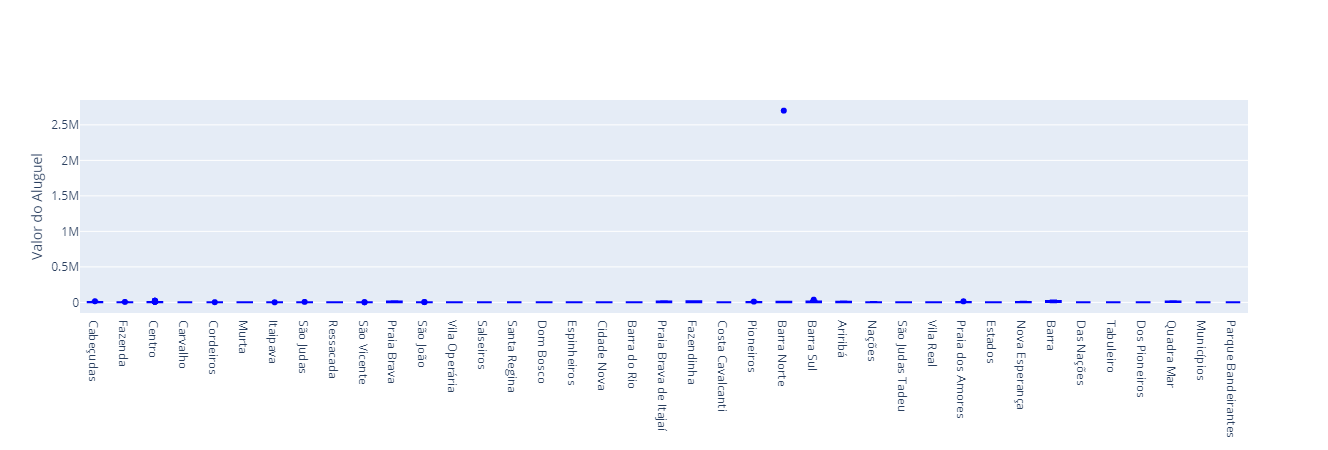

In [192]:
x = df.Bairro

trace0 = go.Box(
    y=df.Valor,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='Valor do Aluguel',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Como podemos observar, temos um ponto com o valor acima de 2.5 milhões. Para uma residência, por maior que ela seja, esse preço de aluguel não faria sentido. Para evitar que dados discrepantes possam enviesar os resultados, aplicamos o Método Turco para identificar outliers: Um passo do discrepante é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele será considerado anormal. E removeremos os outliers que estiverem duplicados em mais de uma features

In [193]:
import itertools
import numpy as np

outliers_lst = []

for feature in df.keys():
    
    if df[feature].dtype == object:
        continue
        
    if feature == 'index':
        continue
    
    #if feature != 'Area':
    #    continue
    
    Q1 = np.percentile(df[feature], 25)    
    Q3 = np.percentile(df[feature], 75)
    
    step = 1.5 * (Q3-Q1)
    
    r_outlier = df[~((df[feature] >= Q1 - step) & (df[feature] <= Q3 + step))]
      
    outliers_lst.append(list(r_outlier.index))
    
       
outliers = list(itertools.chain.from_iterable(outliers_lst))

uniq_outliers = list(set(outliers))    

print( 'Unique list:\n', uniq_outliers)

df = df.drop(df.index[uniq_outliers]).reset_index(drop = True)

Unique list:
 [1024, 0, 1026, 1027, 1028, 5, 1030, 6, 520, 516, 518, 521, 524, 1034, 1036, 23, 536, 35, 1062, 1064, 44, 1070, 1072, 49, 562, 50, 1079, 567, 571, 572, 1083, 62, 1085, 576, 575, 1089, 1084, 583, 1096, 73, 588, 1101, 78, 1104, 1105, 1109, 86, 1119, 1120, 1124, 101, 1126, 1138, 627, 1144, 123, 124, 126, 1152, 129, 1154, 135, 1160, 139, 651, 652, 1163, 1169, 658, 1170, 1174, 663, 664, 161, 162, 1187, 1189, 678, 679, 680, 166, 685, 694, 183, 1213, 703, 1218, 1221, 1223, 712, 1227, 203, 719, 1231, 210, 722, 1236, 725, 1239, 729, 1241, 732, 733, 1244, 1249, 739, 1256, 233, 745, 1259, 236, 1262, 754, 1271, 763, 1276, 257, 1283, 773, 262, 265, 268, 269, 270, 1294, 784, 1297, 274, 275, 1300, 1302, 1305, 1306, 795, 1309, 799, 287, 289, 801, 1313, 1315, 1317, 806, 807, 1319, 297, 1323, 812, 813, 1325, 1327, 304, 817, 306, 1330, 820, 1333, 1334, 1335, 1341, 831, 1345, 834, 835, 326, 327, 840, 1355, 1356, 333, 334, 1358, 850, 851, 855, 347, 1373, 1374, 1376, 870, 358, 872, 873, 1385, 

IndexError: index 1024 is out of bounds for axis 0 with size 641

In [194]:
df = df[df.Valor < 200000]

Agora vou calcular novamente o indice de disperção e reconstruir o boxplot

In [195]:
df.Valor.var()/df.Valor.mean()

3893.315172572423

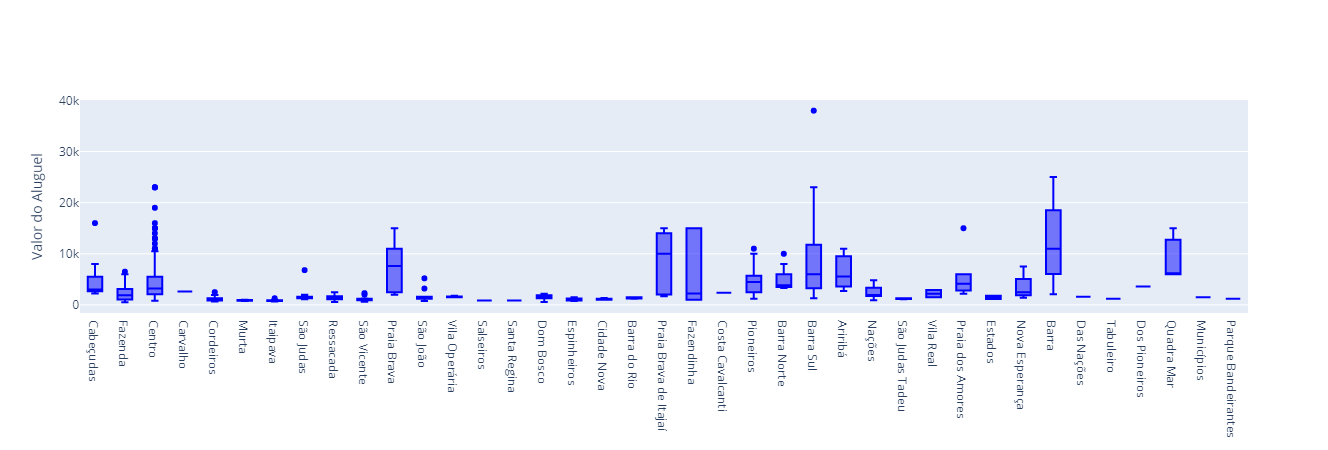

In [196]:
x = df.Bairro

trace0 = go.Box(
    y=df.Valor,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='Valor do Aluguel',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Como estou trabalhando com duas cidades ao mesmo tempo, Itajaí e Balneário Camboriú, pode acontecer de ambas as cidades possuírem bairros com o mesmo nome. Dessa forma, irei criar uma coluna extrar apenas para que possamos ter bairros únicos

In [197]:
df['distrito'] = df.Bairro + ' - ' + df.Cidade

In [198]:
print("Mean: %f" % df.Valor.mean())
print("Median: %f" % df.Valor.median())
print("Skewness: %f" % df.Valor.skew())
print("Kurtosis: %f" % df.Valor.kurt())
print("Quantile: %f" % df.Valor.quantile(0.90))

Mean: 3989.114062
Median: 2750.000000
Skewness: 2.918057
Kurtosis: 13.403876
Quantile: 8050.000000


Temos muitos outliers como podemos observar, principalmente na região central de Balneario Camboriú. Também podemos observar que todos os bairros que são próximos ao mar apresentam um preço elevado, por exemplo: Praia Brava, Barra Sul e Barra Norte.
Nessa análise inicial, iremos considerar alugueis de no máximo 9000, já que 90% dos valores estão até essa margem de preço. Apesar que este valor está muito acima do que eu procuro para alugar :-)    

In [199]:
df = df[df.Valor <= 8500]

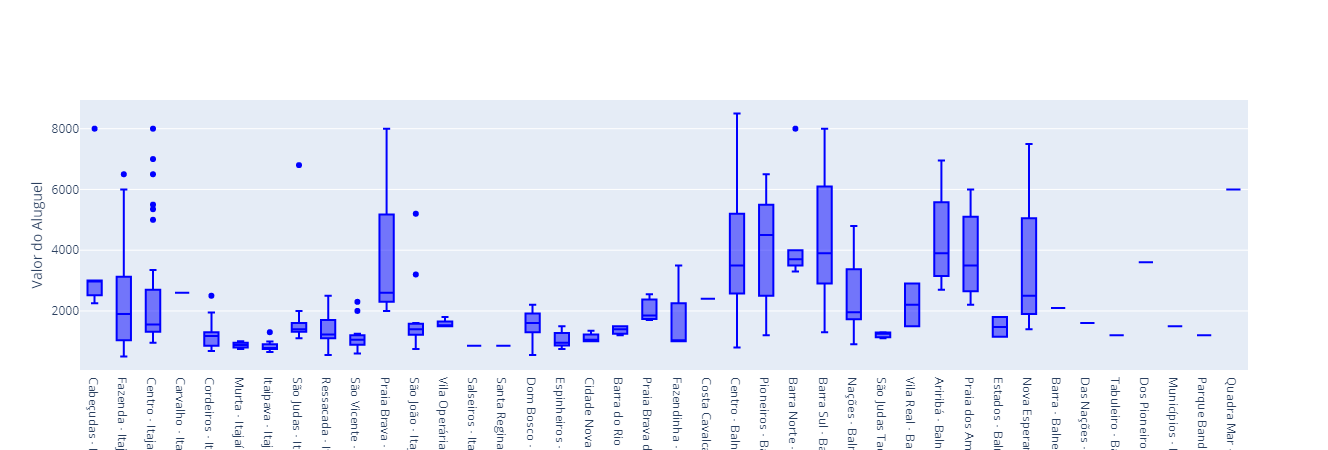

In [200]:
x = df.distrito

trace0 = go.Box(
    y=df.Valor,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='Valor do Aluguel',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Bem, parece que melhoramos um pouco. Mas os bairros relacionados a praia continuam sendo os bairros mais caros,

In [159]:
df.shape

(579, 20)

Estou analisando duas cidades diferentes. E esotu fazendo isto porque na prática estas duas cidades podem ser consideradas uma cidade só, porém é sabido que as áreas de Balneário Camboriú apresentam custos maior de imóveis, e isto reflete diretamente no aluguel, conforme pode ser observado

Podemos observar que nossos dados estão muito concentrados a esquerda do gráfico (assimetria - skewness), e a nossa curva da distribuição de probabilidade (curtose) apresenta um achatamento consideravel em relação à curva da distribuição normal. Como nossos dados estão distribuídos de forma assimétrica, isso nos diz que o valor médio deve estar sendo influenciado fortimente por valores mais altos, mesmo que os valores altos sejam a minoria (a direita da distribuição). Ainda através da curtose, podemos dizer que os alugueis não estão concentrados em uma faixa de preço próxima ao centro da distribuição. Como não temos um conjunto amostral tão grande e nossa distribuição é assimétrica, acredito que a mediana/quantis irá nos dar uma medida mais representativa de como está a prática dos valores dos alugueis

Vamos ver graficamente o que acontece graficamente

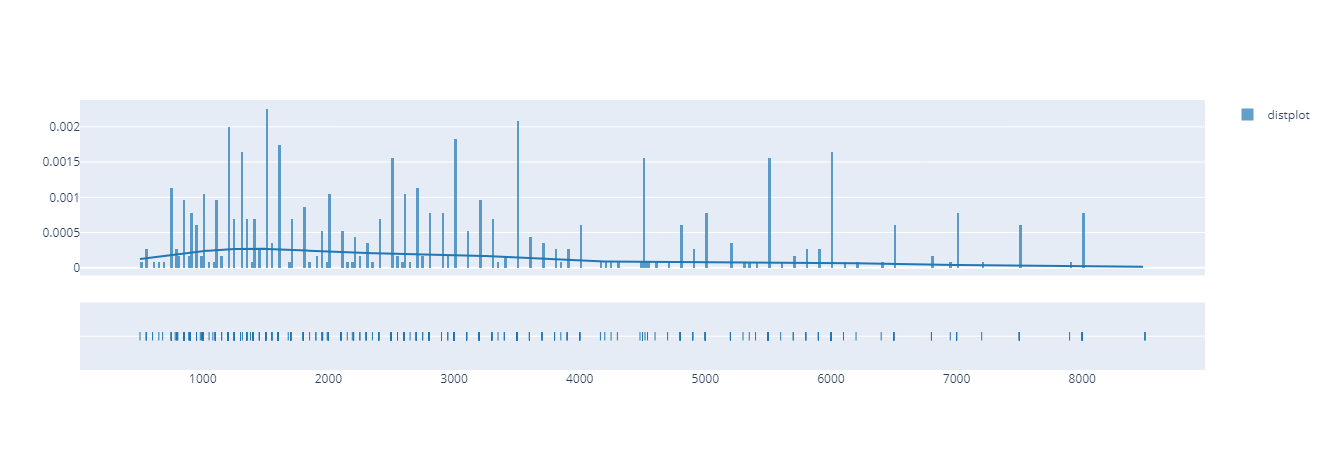

In [160]:
import seaborn as sns
import plotly.figure_factory as ff

hist_data = [df.Valor]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Rental Price Distribution')


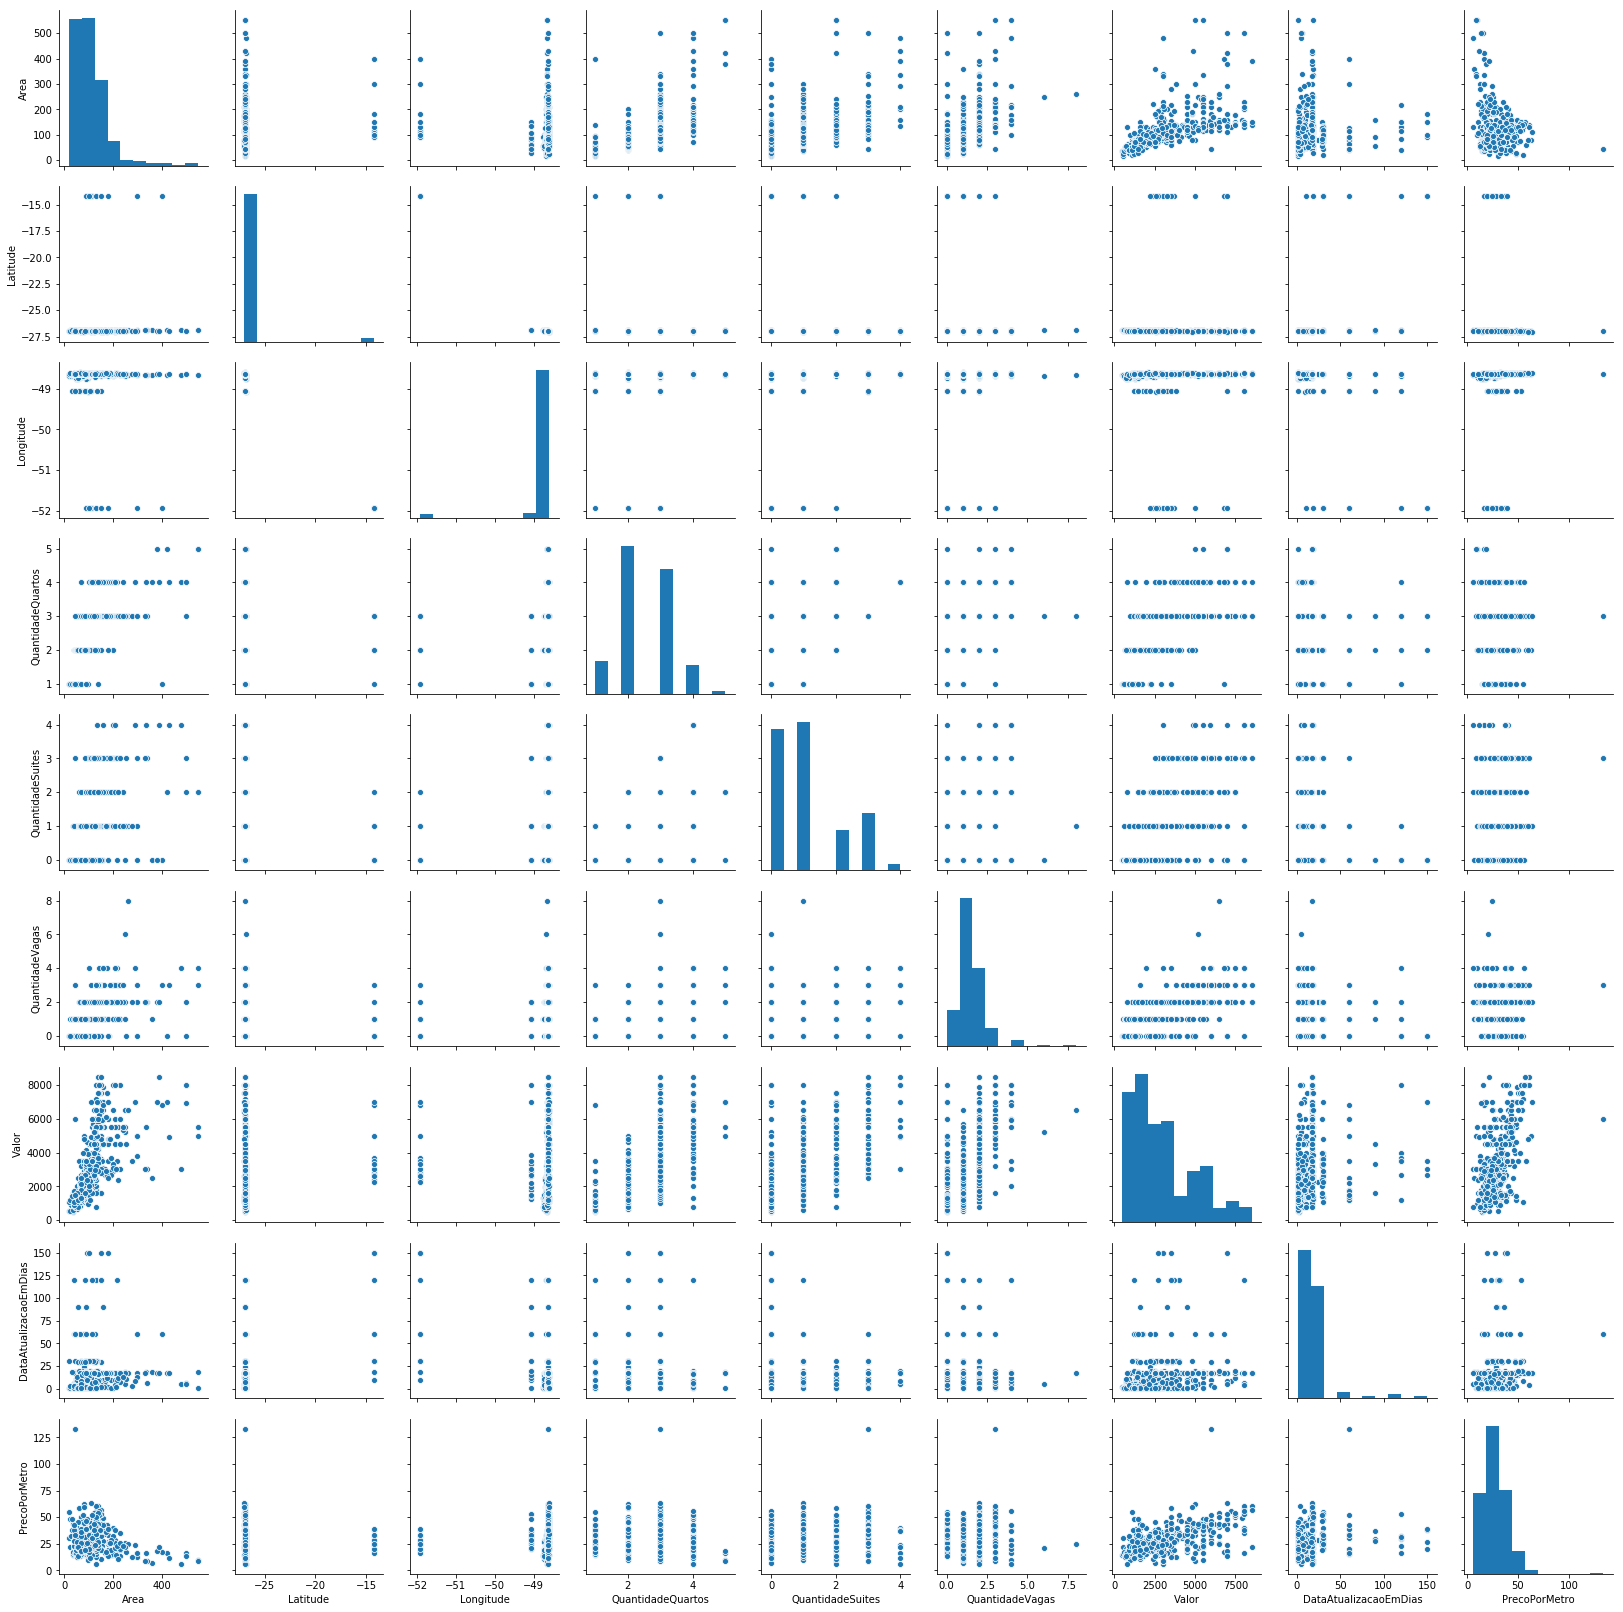

In [161]:
dfa = df[
    ["Area", 
     "distrito", 
     "Latitude", 
     "Longitude", 
     "QuantidadeQuartos", 
     "QuantidadeSuites", 
     "QuantidadeVagas", 
     "Valor", 
     "DataAtualizacaoEmDias", 
     "PrecoPorMetro"]
]
sns.pairplot(dfa)

O que pode ser observado no gráfico pairplot acima eu já tinha idéia, o valor dos alugueis varia de formar  mais ou menos linear de acordo com o tamanho do apartamento. Também é proporcional ao número de quartos, e aí incluímos a suíte. Porém, o que achei interessante é que o PreçoPorMetro está concentrando em uma certa Area, caso a residência venha a ser maior do que 150 metros, o PrecoPorMetro passa a diminuir. Isto pode querer dizer algumas coias, por exemplo, que as familias ou pessoas solteiras não querem residências muito grandes, e/ou estas residências com uma grande área estão localizadas em áreas mais remotas, como o interior da cidade, onde o aluguel poderia ser mais barato

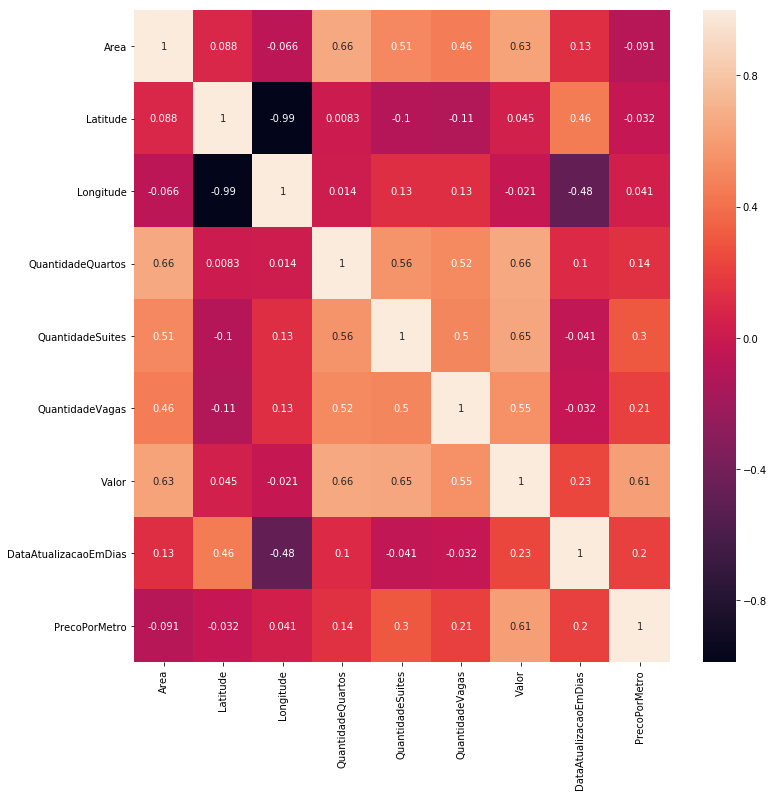

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

sns.heatmap(dfa.corr(), annot=True)

Vou dar uma olhada nas relações que mais apresentaram correlação: Area x Valor

c:\users\paulo\projects\ml_ambient\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



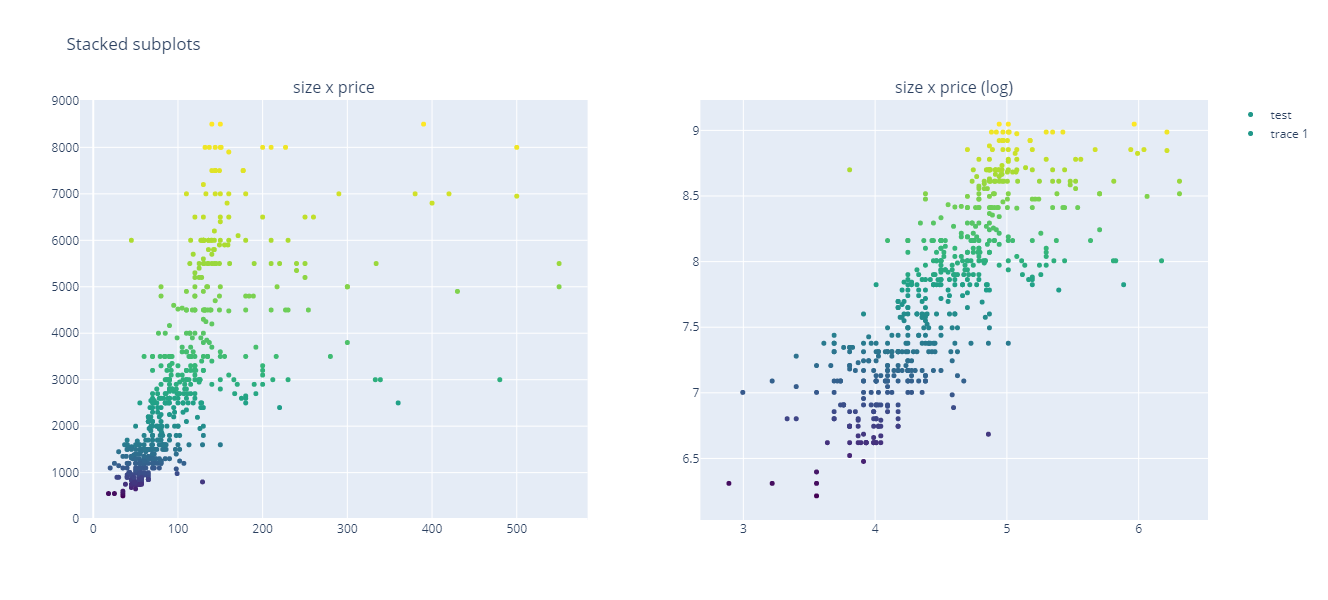

In [163]:
import numpy as np
import plotly.tools as tools

trace1 = go.Scatter(
    name='test',
    x = df.Area,
    y = df.Valor,
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.Valor), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace2 = go.Scatter(
    x = np.log(df.Area),
    y = np.log(df.Valor),
    mode='markers',
    marker=dict(
        size=5,
        color = np.log(df.Valor), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('size x price', 'size x price (log)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)


fig['layout'].update(height=600, width=800, title='Stacked subplots')
iplot(fig)

In [164]:
df['Endereco'].value_counts().head(30)

Avenida Atlântica              35
Rua 1401                       25
Avenida Brasil                 20
Rua Edgar Linhares              9
Avenida Itaipava                8
Rua Heitor Liberato             7
Rua 3706                        7
Rua 1131                        7
Rua 1301                        6
Rua Uruguai                     6
Rua Lauro Muller                6
Rua Brusque                     6
Rua Samuel Heusi                5
Rua 2700                        5
Rua 1101                        5
Rua 2500                        5
Rua Miguel Matte                5
Rua José Rosa                   5
Rua 1061                        5
Rua 1950                        5
Rua Doutor Pedro Ferreira       4
Avenida Central                 4
Rua Fermino Vieira Cordeiro     4
Rua 2870                        4
Rua 3700                        4
Rua 3100                        4
Rua Giuzepina Cogo Casini       4
Rua Suécia                      4
Rua Júlio Willerding            4
Rua Justiniano

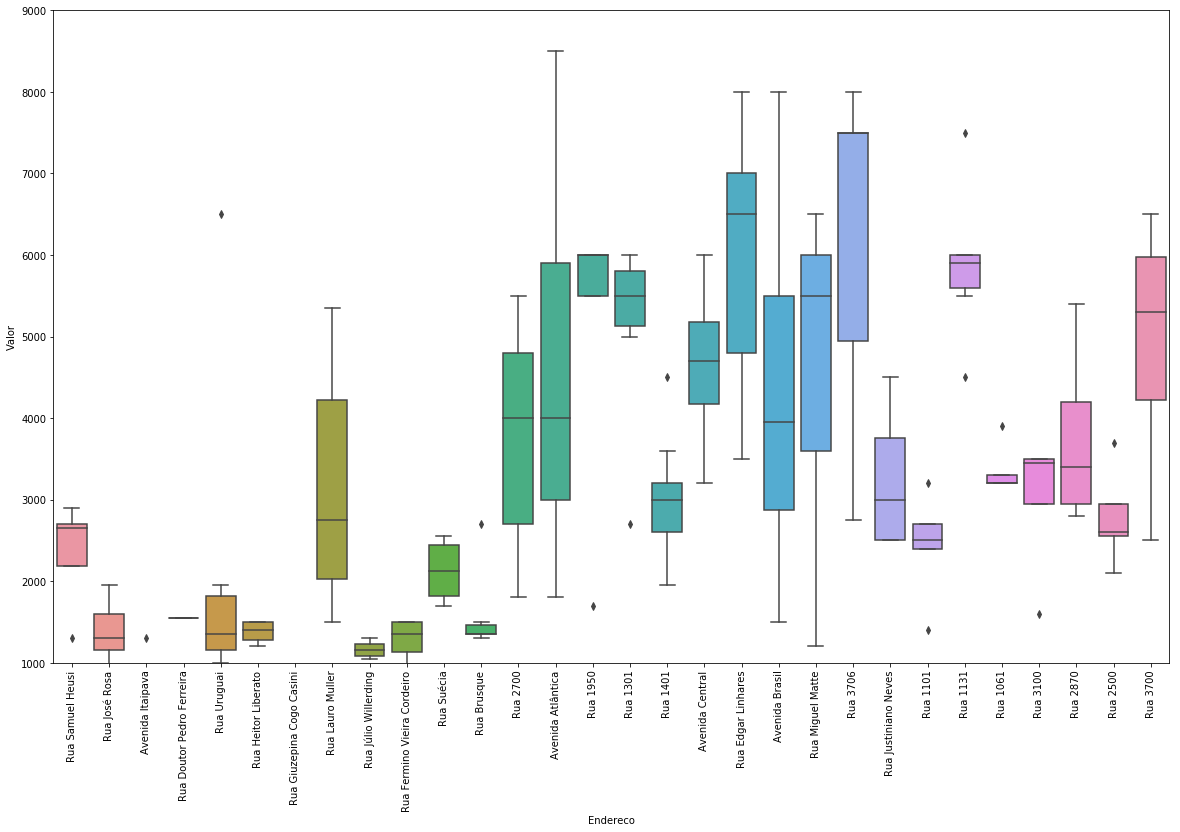

In [165]:
var = 'Endereco'

df_popular_spots = df[(df[var].isin(list(df[var].value_counts().head(30).index)))]


data = pd.concat([df_popular_spots.Valor, df_popular_spots.loc[:,var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="Valor", data=data)
fig.axis(ymin=1000, ymax=9000);
plt.xticks(rotation=90);

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)

In [166]:
import folium
from folium import pluginsa

ImportError: cannot import name 'pluginsa'

In [167]:
df.PrecoPorMetro.quantile(0.95)

48.34210526315791

In [168]:
m = folium.Map([-26.9106,-48.671], zoom_start=12, tiles='Stamen Toner')

for i,row in df.iterrows():
    
    red = int((row.PrecoPorMetro / 50) * 255)
    
    green = 255 - red
    
    html = '#%02x%02x%02x' % (red, green, 0) #convert rgb to html
    
    house_string = '{} - {}m2'.format(row.Valor, row.Area)
    
    marker = folium.CircleMarker(location=[row.Latitude,row.Longitude], radius=(row.QuantidadeQuartos*5), color=html, fill=html, fill_opacity='0.3', popup=house_string)

    m.add_child(marker)


marker = folium.Marker(location=[-26.9106,-48.671])

m.add_child(marker)
        
m

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [170]:
df = df.join(pd.get_dummies(df.distrito))
df = df.join(pd.get_dummies(df.Endereco))

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 1461
Columns: 330 entries, Area to Travessa José Paulo da Silva
dtypes: float64(6), int64(5), object(9), uint8(310)
memory usage: 290.3+ KB


In [172]:
df = df.drop(columns=[
    "Bairro", "DataAtualizacaoHumanizada","Estado", "Cidade",
    "FormatarSubTipoImovel", "FormatarSubTipoOferta", "Endereco", "SubTipoOferta", "distrito"
])

In [173]:
df = df.drop(columns="PrecoPorMetro")

In [174]:
X_train, x_test, Y_train, y_test = train_test_split(df.drop('Valor', axis=1), df.Valor)
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [175]:
pred = model.predict(x_test)

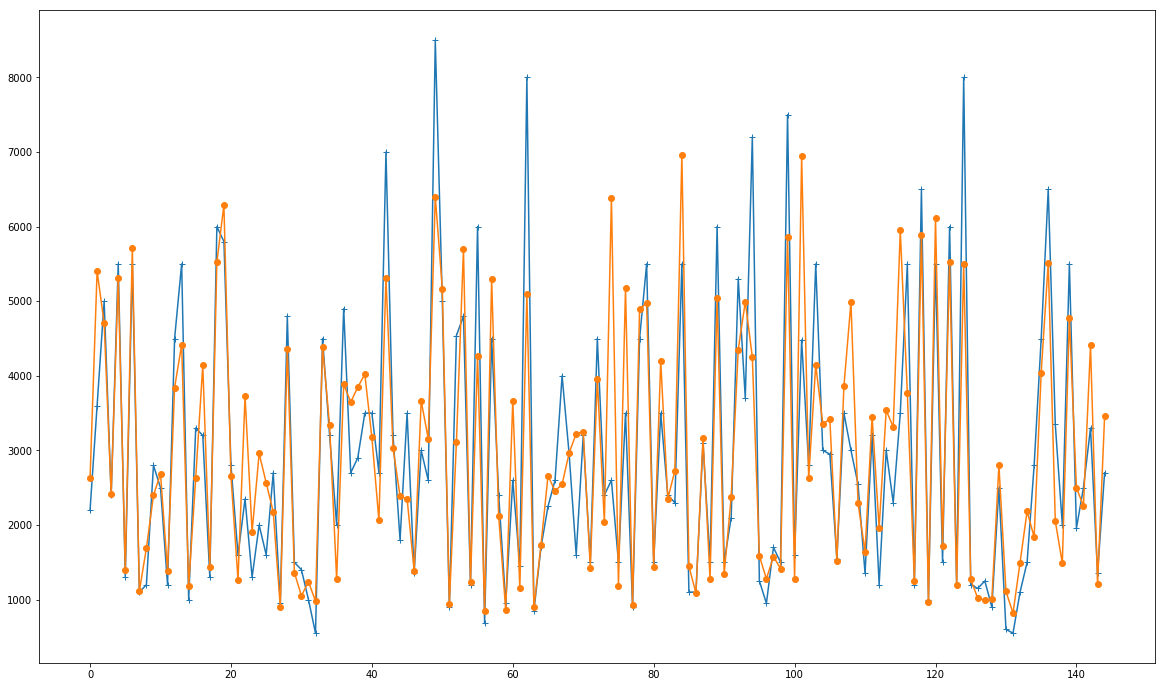

In [176]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test.shape[0]), y_test, marker='+')
plt.plot(range(0, pred.shape[0]), pred, marker='o')

In [177]:
model.score(x_test, y_test)

0.7464128947377242

In [178]:
important_features_dict = {}
for x,i in enumerate(model.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: {}', important_features_list[:15])

Most important features: {} [0, 2, 6, 8, 1, 5, 4, 51, 3, 7, 191, 125, 38, 292, 106]


In [179]:
feature_importances = {}
feature_importances_rank = {}

i = 0

for item in important_features_list[:15]:
    
    feature_importances[i] = X_train.columns[item]
    feature_importances_rank[feature_importances[i]] = important_features_dict[item]
    i = i+1

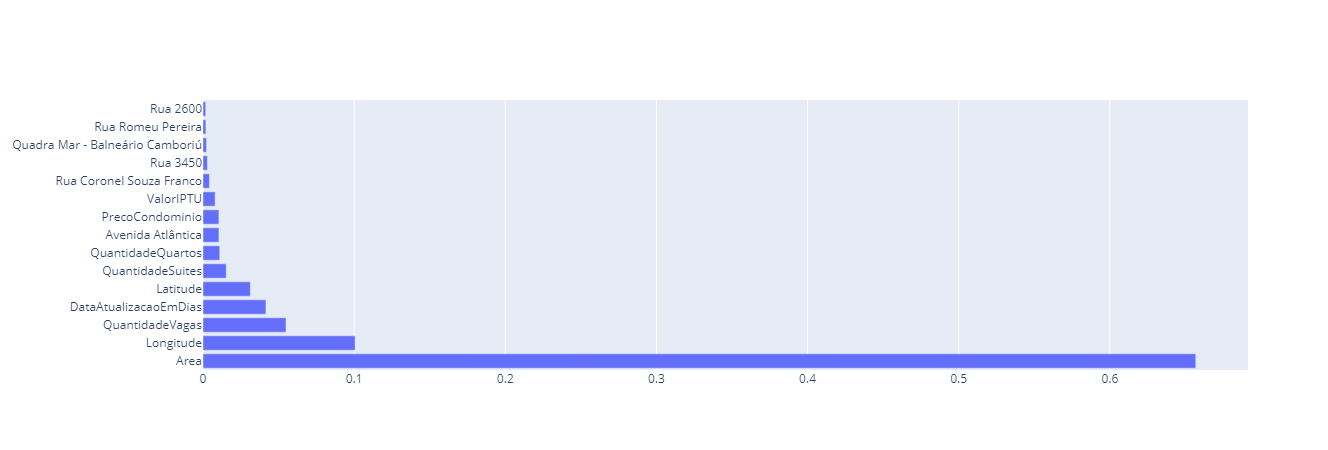

In [180]:
fig = go.Figure(go.Bar(
            y=list(feature_importances_rank.keys()),
            x=list(feature_importances_rank.values()),
            orientation='h'))

fig.show()